<a href="https://colab.research.google.com/github/hayaboy/ADP_Practical_Exam/blob/main/%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 동전던지기에서 나오는 면에 대한 확률변수와 주사위 던지기에서 나올 숫자에 대한 확률변수의 엔트로피를 구해보자

In [5]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.2 MB/s eta 0:00:00


In [4]:
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD
import pgmpy

ModuleNotFoundError: No module named 'pgmpy'

In [7]:
# 동전던지기
p=[1/2,1/2]

In [8]:
np.round([entropy(p,base=2), entropy(p,base=np.e)],3)

array([1.   , 0.693])

In [9]:
# 주사위 던지기
p=1/6*np.ones(6)
np.round([entropy(p,base=2), entropy(p,base=np.e)],3)

array([2.585, 1.792])

결과를 보면 서로 독립인 사건에 대한 엔트로피는 각각의 사건에 대한 정보량과 일치함을 알 수 있다.   
동전 던지기에서 앞면이 나올 확률을 p라고 하면 엔트로피는 다음과 같다.  

H(X) = - p log p - (1-p) log(1-p)

이를 p에 관한 함수로 하여 그래프를 그리면 아래와 같다.

<ipython-input-10-5b6b794c140f>:2: RuntimeWarning: divide by zero encountered in log2
  y= -p*np.log2(p) - (1-p)*np.log2(1-p)
<ipython-input-10-5b6b794c140f>:2: RuntimeWarning: invalid value encountered in multiply
  y= -p*np.log2(p) - (1-p)*np.log2(1-p)


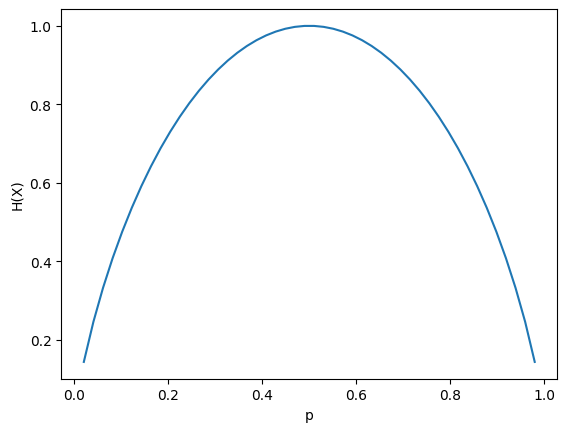

In [10]:
p=np.linspace(0, 1)
y= -p*np.log2(p) - (1-p)*np.log2(1-p)
plt.plot(p,y)
plt.xlabel('p')
plt.ylabel('H(X)')
plt.show()

위 그림을 보면 앞면 또는 뒷면이 나올 확률이 동등한 경우는 엔트로피 값이 제일 크고, 즉 불확실성이 가장 높고, 한쪽으로 치우칠 확률인 경우, 즉 앞면이 나올 확률이 1이거나 0인 경우는 엔트로피 값이 0이다. 이 그림의 결과로 보면 확률이 동등할 때 동전 던지기 결과를 전송하는 경우에 오일러 상수 산위로 대략 0.7정도가 필요함을 알수 있다. 확률변수가 베르누이 시행의 결과 값을 갖는다고 하면 위의 식을 특별히 이진 엔트로피 함수(binary entropy function)라고 한다.

In [11]:
# 결합 엔트로피

In [12]:
p=1/15*np.array([2,4,3,1,1,4])

In [13]:
p

array([0.13333333, 0.26666667, 0.2       , 0.06666667, 0.06666667,
       0.26666667])

In [14]:
log_p=-np.log(p)

In [15]:
log_p

array([2.01490302, 1.32175584, 1.60943791, 2.7080502 , 2.7080502 ,
       1.32175584])

In [18]:
H_XY=np.dot(p,log_p)

In [19]:
H_XY.round(3)

1.657

In [20]:
# 조건부 엔트로피

In [21]:
# 결합 확률 정의

In [22]:
prob=1/15*np.array([2,4,3,1,1,4])

In [23]:
fxy = JPD(['X', 'Y'], [2, 3], prob)
print(fxy)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1333 |
+------+------+----------+
| X(0) | Y(1) |   0.2667 |
+------+------+----------+
| X(0) | Y(2) |   0.2000 |
+------+------+----------+
| X(1) | Y(0) |   0.0667 |
+------+------+----------+
| X(1) | Y(1) |   0.0667 |
+------+------+----------+
| X(1) | Y(2) |   0.2667 |
+------+------+----------+


In [25]:
# help(JPD)

In [26]:
# 조건부 확률 예시

In [27]:
prob=fxy.conditional_distribution([('Y', 0)], inplace=False)
print(prob)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6667 |
+------+--------+
| X(1) | 0.3333 |
+------+--------+


In [28]:
# 조건부 엔트로피 계산

In [38]:
res_sum=[]

In [30]:
# 모든 x에 대하여


In [39]:
for i in fxy.state_names['X']:
    # 모든 y에 대하여
    for j in fxy.state_names['Y']:
        # 조건부 확률 계산
        cond_y=fxy.conditional_distribution([('Y', j)], inplace=False).values[i]
        res = -fxy.values[i,j]*np.log(cond_y)
        res_sum.append(res)
    # 결과
print(np.sum(res_sum).round(3))

0.613


In [40]:
# H(X,Y) - H(Y) 이용

# H(X,Y) 계산



In [46]:
fxy.values

array([[0.13333333, 0.26666667, 0.2       ],
       [0.06666667, 0.06666667, 0.26666667]])

In [47]:
fxy.values.reshape(-1)

array([0.13333333, 0.26666667, 0.2       , 0.06666667, 0.06666667,
       0.26666667])

In [45]:
H_XY=np.dot(fxy.values.reshape(-1), -np.log(fxy.values.reshape(-1)))

In [48]:
H_XY

1.656551126696654

In [42]:
# H_Y 계산

In [49]:
prob_y=fxy.marginal_distribution(['Y'], inplace=False).values
H_Y=np.dot(prob_y, -np.log(prob_y))

In [50]:
np.round(H_XY - H_Y, 3)

0.613

In [1]:
# 교차 엔트로피

In [2]:
px=[1/4,1/2,1/4]
qx=[1/3,1/3,1/3]

In [5]:
hpq=np.dot(px, -np.log(qx))
hpq.round(3)

1.099